<a href="https://colab.research.google.com/github/AnkitaDasData/AnalyticsHub/blob/main/Projects%20/LLM_with_Semantic_Search/Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embeddings

Numerical representation of texts that computers can parse well

Note: The numeric values of embeddings you see in your notebook may vary slightly from those filmed.

### Setup
Load needed API keys and relevant Python libaries.

In [1]:
# Step 1: Install the library
#!pip install cohere altair altair_saver datasets
#!pip install python-dotenv

# Uninstall the existing UMAP package if it exists
#!pip uninstall umap
#!pip uninstall -y umap

# Install UMAP-learn from a specified mirror
#!pip install umap-learn[plot] #-i https://mirrors.ustc.edu.cn/pypi/web/simple
#!pip install umap-learn[umap_visualization]

# Also, ensure that any additional plotting libraries required by umap are installed
#!pip install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
# If you're trying to install a specific utility library, correct the syntax. For example, if it's a utility for plotting UMAP:
#!pip install utils

#!pip install selenium
#!pip install chromedriver_autoinstaller
# Install Node.js and the necessary tools
#!apt-get install nodejs npm -y
#!npm install -g vega vega-lite vega-cli canvas

#!apt-get update
#!apt-get install -y nodejs
#!npm install -g n
#!n stable
#!npm install -g vega vega-lite vega-cli canvas

!pip install webdriver_manager

In [2]:
# Step 2: Import necessary libraries
import cohere
import os
import sys
import pandas as pd
import altair as alt
import umap.umap_ as umap

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image as PILImage
import numpy as np

from google.colab import files
import altair_saver
from IPython.display import Image

import json

# Try importing umap.plot directly from umap-learn
try:
    from umap import plot as umap_plot # Change this to the expected submodule
except ImportError:
    print("umap.plot is not available. Please install it with pip install umap-learn[plot]")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn

In [3]:
# Step 3: Connecting
#library of functions that use LLM called via API
# Set your API key here
os.environ['COHERE_API_KEY'] = 'pEyGu0nvKEqSeqFYTc6VP0YVlaYcOi7yzZ3e3IMI'
co = cohere.Client(os.environ['COHERE_API_KEY'])

## Word Embeddings

Consider a very small dataset of three words.

In [4]:
three_words = pd.DataFrame({'text':
  [
      'joy',
      'happiness',
      'potato'
  ]})
three_words

,text
0,joy
1,happiness
2,potato


Let's create the embeddings for the three words:
You may see an 'unknown field' warning which can be ignored.

In [5]:
three_words_emb = co.embed(texts=list(three_words['text']),
                           model='embed-english-v2.0').embeddings
#dataset - three_words, column -'text'    , model to be used

In [6]:
word_1 = three_words_emb[0]
word_2 = three_words_emb[1]
word_3 = three_words_emb[2]

In [7]:
word_1[:10]

[2.3203125,
 -0.18334961,
 -0.578125,
 -0.7314453,
 -2.2050781,
 -2.59375,
 0.35205078,
 -1.6220703,
 0.27954102,
 0.3083496]

## Sentence Embeddings

Consider a very small dataset of three sentences.

In [8]:
sentences = pd.DataFrame({'text':
  [
   'Where is the world cup?',
   'The world cup is in Qatar',
   'What color is the sky?',
   'The sky is blue',
   'Where does the bear live?',
   'The bear lives in the the woods',
   'What is an apple?',
   'An apple is a fruit',
  ]})
sentences

,text
0,Where is the world cup?
1,The world cup is in Qatar
2,What color is the sky?
3,The sky is blue
4,Where does the bear live?
5,The bear lives in the the woods
6,What is an apple?
7,An apple is a fruit


Let's create the embeddings for the three sentences:

In [9]:
emb = co.embed(texts=list(sentences['text']),
               model='embed-english-v2.0').embeddings
# Explore the 10 first entries of the embeddings of the 3 sentences:
for e in emb:
    print(e[:3])

[0.27319336, -0.37768555, -1.0273438]
[0.49804688, 1.2236328, 0.4074707]
[-0.23571777, -0.9375, 0.9614258]
[0.08300781, -0.32080078, 0.9272461]
[0.49780273, -0.35058594, -1.6171875]
[1.2294922, -1.3779297, -1.8378906]
[0.15686035, -0.92041016, 1.5996094]
[1.0761719, -0.7211914, 0.9296875]


In [10]:
len(emb[0])

4096

The next code cell is for hiding some warnings that appear when importing the `umap_plot` library.

In [11]:
# hide the warnings that would appear when importing the UMAP library
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning
import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [12]:
# Fit UMAP and generate embeddings (adjust 'emb' to match your own data)
reducer = umap.UMAP(n_neighbors=2, min_dist=0.0, metric='cosine')
embedding = reducer.fit_transform(emb)

# Create a DataFrame for the embedding
df = pd.DataFrame(embedding, columns=['x', 'y'])
df['text'] = sentences['text']

# Create an interactive Altair chart #Wont showup in GitHub
chart = alt.Chart(df).mark_circle(size=60).encode(
    x='x',
    y='y',
    color='label:N',
    tooltip=['text'],  # Tooltip showing text on hover
).interactive()

# Display the chart
chart.display()

chart.save('chart.json')



/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


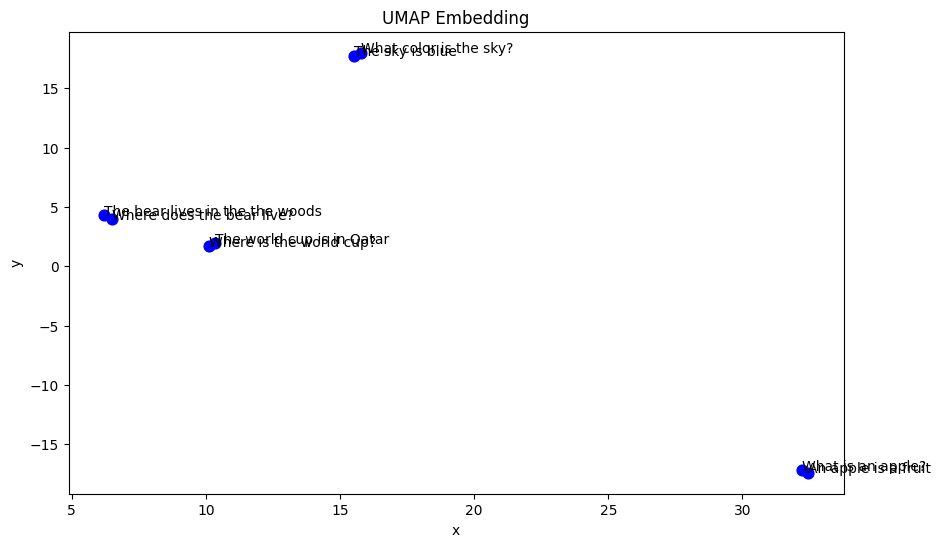

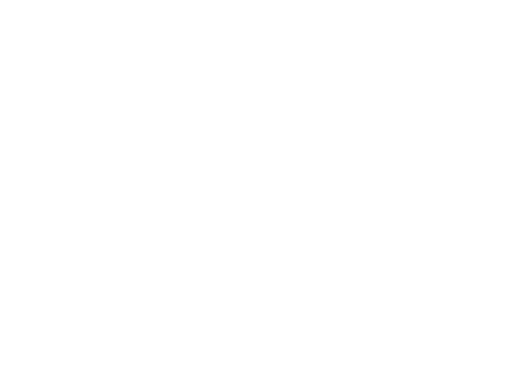

In [13]:
# Fit UMAP and generate embeddings (assuming 'emb' and 'sentences' exist)
reducer = umap.UMAP(n_neighbors=2, min_dist=0.0, metric='cosine')
embedding = reducer.fit_transform(emb)

# Create a DataFrame for the embedding
df = pd.DataFrame(embedding, columns=['x', 'y'])
df['text'] = sentences['text']

# Plot using Matplotlib for a static image
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], c='blue', s=60)

# Annotate points with text labels
for i, txt in enumerate(df['text']):
    plt.annotate(txt, (df['x'][i], df['y'][i]))

plt.title('UMAP Embedding')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Save the static image as PNG
plt.savefig('chart.png')

# Display the saved PNG image
img = plt.imread('chart.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## Articles Embeddings

In [14]:
# Upload a file to Colab
from google.colab import files
uploaded = files.upload()

# This will allow you to select and upload the file manually

# Upload a file to Colab
wiki_articles = pd.read_pickle('wikipedia.pkl')
wiki_articles

Saving wikipedia.pkl to wikipedia (4).pkl


(['EleutherAI/pythia-70m',
  'EleutherAI/pythia-160m',
  'EleutherAI/pythia-410m',
  'EleutherAI/pythia-1b',
  'EleutherAI/pythia-1.4b',
  'EleutherAI/pythia-2.8b',
  'EleutherAI/pythia-12b'],
 ['Pseudo bit error ratio (PBER) in adaptive high-frequency (HF) radio, is a bit error ratio derived',
  'The Xingu River ( ; , ; Mẽbêngôkre: Byti, ) is a  river in north Brazil.',
  'Lord Protector (plural: Lords Protector) was a title that has been used in British constitutional law for the',
  'A gem, or gemstone, is a cut rock or mineral.\n\nGem or GEM may also refer',
  'Potter Heigham is a village and civil parish on the River Thurne in the English county of Norfolk. It is',
  'In Greek mythology, the Ceryneian hind ( Kerynitis elaphos, Latin:',
  'Assyrian language may refer to:\n\n Ancient Assyrian language, a dialect of the ancient East',
  'The River Afan () is a river in Wales whose valley formed the',
  'Florence Delorez Griffith Joyner (born Florence Delorez Griffith; December 21, 19

In [15]:
# Print the type of wiki_articles to understand its structure
print(type(wiki_articles))


<class 'tuple'>


In [16]:
# Check the length of the tuple and the types of its elements
print(f"Length of tuple: {len(wiki_articles)}")

# Print the type of each element inside the tuple
for i, element in enumerate(wiki_articles):
    print(f"Element {i} is of type: {type(element)}")

# Optionally print the first few elements of each to inspect the data
for i, element in enumerate(wiki_articles):
    if isinstance(element, (list, np.ndarray)):
        print(f"First 5 elements of Element {i}: {element[:5]}")
    else:
        print(f"Element {i}: {element}")


Length of tuple: 3
Element 0 is of type: <class 'list'>
Element 1 is of type: <class 'list'>
Element 2 is of type: <class 'numpy.ndarray'>
First 5 elements of Element 0: ['EleutherAI/pythia-70m', 'EleutherAI/pythia-160m', 'EleutherAI/pythia-410m', 'EleutherAI/pythia-1b', 'EleutherAI/pythia-1.4b']
First 5 elements of Element 1: ['Pseudo bit error ratio (PBER) in adaptive high-frequency (HF) radio, is a bit error ratio derived', 'The Xingu River ( ; , ; Mẽbêngôkre: Byti, ) is a  river in north Brazil.', 'Lord Protector (plural: Lords Protector) was a title that has been used in British constitutional law for the', 'A gem, or gemstone, is a cut rock or mineral.\n\nGem or GEM may also refer', 'Potter Heigham is a village and civil parish on the River Thurne in the English county of Norfolk. It is']
First 5 elements of Element 2: [[[1.7881e-07 0.0000e+00 2.3842e-07 ... 2.9802e-07 5.9605e-07 4.8280e-06]
  [1.7881e-06 0.0000e+00 1.3709e-06 ... 5.9605e-07 1.7285e-06 1.2517e-05]
  [2.6226e-06 0

In [17]:
# Unpack the tuple
titles = wiki_articles[0]  # Article titles
texts = wiki_articles[1]   # Article texts
embeddings = wiki_articles[2]  # 3D NumPy array of embeddings

# Reduce the dimensionality of the embeddings to 2D for each of the 7 articles
embeddings_2d = embeddings.mean(axis=0)  # Shape is (7, n_features)

# Apply UMAP to reduce dimensionality to 2D
reducer = umap.UMAP(n_neighbors=2, min_dist=0.0, metric='cosine')
embedding_2d = reducer.fit_transform(embeddings_2d)

# Ensure embedding_2d has 7 rows
print(f"Reduced embedding shape: {embedding_2d.shape}")  # Should be (7, 2)

# Create a DataFrame with the 2D embeddings, titles, and texts
df = pd.DataFrame(embedding_2d, columns=['x', 'y'])
df['Title'] = titles  # 7 titles

# Option 1: Summarize the 100 texts into 7 summaries
texts_summarized = [', '.join(texts[i*14:(i+1)*14]) for i in range(7)]  # 7 summarized texts
df['Text'] = texts_summarized

# Option 2: Select the first 7 texts (alternative option)
# texts_selected = texts[:7]
# df['Text'] = texts_selected

# Create an interactive Altair chart
chart = alt.Chart(df).mark_circle(size=60).encode(
    x='x',
    y='y',
    tooltip=['Title', 'Text'],  # Tooltips showing the title and text
).interactive()

# Display the chart
chart.display()


Reduced embedding shape: (7, 2)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [18]:
#If it's a DataFrame, use .columns.
#If it's a dictionary, use .keys().
#If you're unsure, inspect the data with type() and print a few elements to better understand its structure.

In [19]:
# Check if it's a DataFrame and print the column headers
#if isinstance(wiki_articles, pd.DataFrame):
#    print("Column headers:", wiki_articles.columns)

In [20]:
# Check if it's a dictionary and print the keys (which act as headers)
#if isinstance(wiki_articles, dict):
#    print("Dictionary keys:", wiki_articles.keys())